In [5]:
import findspark
findspark.init()

In [6]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Alex", 34, "Pilot", "Memanah", "Laki-laki"), ("Beno", 23, "Tentara", "Menembak", "Laki-laki"), ("Citra", 29, "Pramugari", "Makeup", "Perempuan"), ("Diana", 25, "Pegawai Bank", "Memasak", "Perempuan")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

+-----+----+------------+--------+---------+
| Nama|Usia|   Pekerjaan|    Hobi|   Gender|
+-----+----+------------+--------+---------+
| Alex|  34|       Pilot| Memanah|Laki-laki|
| Beno|  23|     Tentara|Menembak|Laki-laki|
|Citra|  29|   Pramugari|  Makeup|Perempuan|
|Diana|  25|Pegawai Bank| Memasak|Perempuan|
+-----+----+------------+--------+---------+



In [7]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Alex", 34, "Pilot", "Memanah", "Laki-laki"), ("Beno", 23, "Tentara", "Menembak", "Laki-laki"), ("Citra", 29, "Pramugari", "Makeup", "Perempuan"), ("Diana", 25, "Pegawai Bank", "Memasak", "Perempuan")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()

+-----+----+------------+--------+---------+
| Nama|Usia|   Pekerjaan|    Hobi|   Gender|
+-----+----+------------+--------+---------+
| Alex|  34|       Pilot| Memanah|Laki-laki|
| Beno|  23|     Tentara|Menembak|Laki-laki|
|Citra|  29|   Pramugari|  Makeup|Perempuan|
|Diana|  25|Pegawai Bank| Memasak|Perempuan|
+-----+----+------------+--------+---------+

+----+----+---------+-------+---------+
|Nama|Usia|Pekerjaan|   Hobi|   Gender|
+----+----+---------+-------+---------+
|Alex|  34|    Pilot|Memanah|Laki-laki|
+----+----+---------+-------+---------+

+---------+
|avg(Usia)|
+---------+
|    27.75|
+---------+

+-----+----+------------+--------+---------+
| Nama|Usia|   Pekerjaan|    Hobi|   Gender|
+-----+----+------------+--------+---------+
| Alex|  34|       Pilot| Memanah|Laki-laki|
|Citra|  29|   Pramugari|  Makeup|Perempuan|
|Diana|  25|Pegawai Bank| Memasak|Perempuan|
| Beno|  23|     Tentara|Menembak|Laki-laki|
+-----+----+------------+--------+---------+



In [8]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Alex", "Beno", "Citra", "Diana"], "Usia": [34, 23, 29, 25], "Pekerjaan": ["Pilot", "Tentara", "Pramugari", "Pegawai Bank"], "Hobi": ["Memanah", "Menembak", "Makeup", "Memasak"], "Gender": ["Laki-laki", "Laki-Laki", "Perempuan", "Perempuan"]}
df_pandas = pd.DataFrame(data_pandas)

# Menampilkan DataFrame Pandas
df_pandas

,Nama,Usia,Pekerjaan,Hobi,Gender
0,Alex,34,Pilot,Memanah,Laki-laki
1,Beno,23,Tentara,Menembak,Laki-Laki
2,Citra,29,Pramugari,Makeup,Perempuan
3,Diana,25,Pegawai Bank,Memasak,Perempuan


    Nama  Usia     Pekerjaan
0   Alex    34         Pilot
1   Beno    23       Tentara
2  Citra    29     Pramugari
3  Diana    25  Pegawai Bank
            Usia
count   4.000000
mean   27.750000
std     4.856267
min    23.000000
25%    24.500000
50%    27.000000
75%    30.250000
max    34.000000


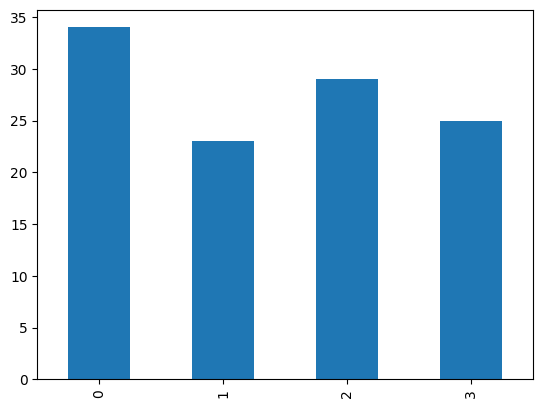

In [14]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Alex", "Beno", "Citra", "Diana"], "Usia": [34, 23, 29, 25]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Alex", "Beno", "Citra", "Diana"], "Pekerjaan": ["Pilot", "Tentara", "Pramugari", "Pegawai Bank"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show()

In [15]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

+-----+----+
| Nama|Usia|
+-----+----+
| Alex|  34|
| Beno|  23|
|Citra|  29|
|Diana|  25|
+-----+----+

+---------+
|avg(Usia)|
+---------+
|    27.75|
+---------+



In [16]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print()
print(df_pandas.describe())

+-----+----+
| Nama|Usia|
+-----+----+
| Alex|  34|
| Beno|  23|
|Citra|  29|
|Diana|  25|
+-----+----+

    Nama  Usia     Pekerjaan
0   Alex    34         Pilot
1   Beno    23       Tentara
2  Citra    29     Pramugari
3  Diana    25  Pegawai Bank

            Usia
count   4.000000
mean   27.750000
std     4.856267
min    23.000000
25%    24.500000
50%    27.000000
75%    30.250000
max    34.000000
